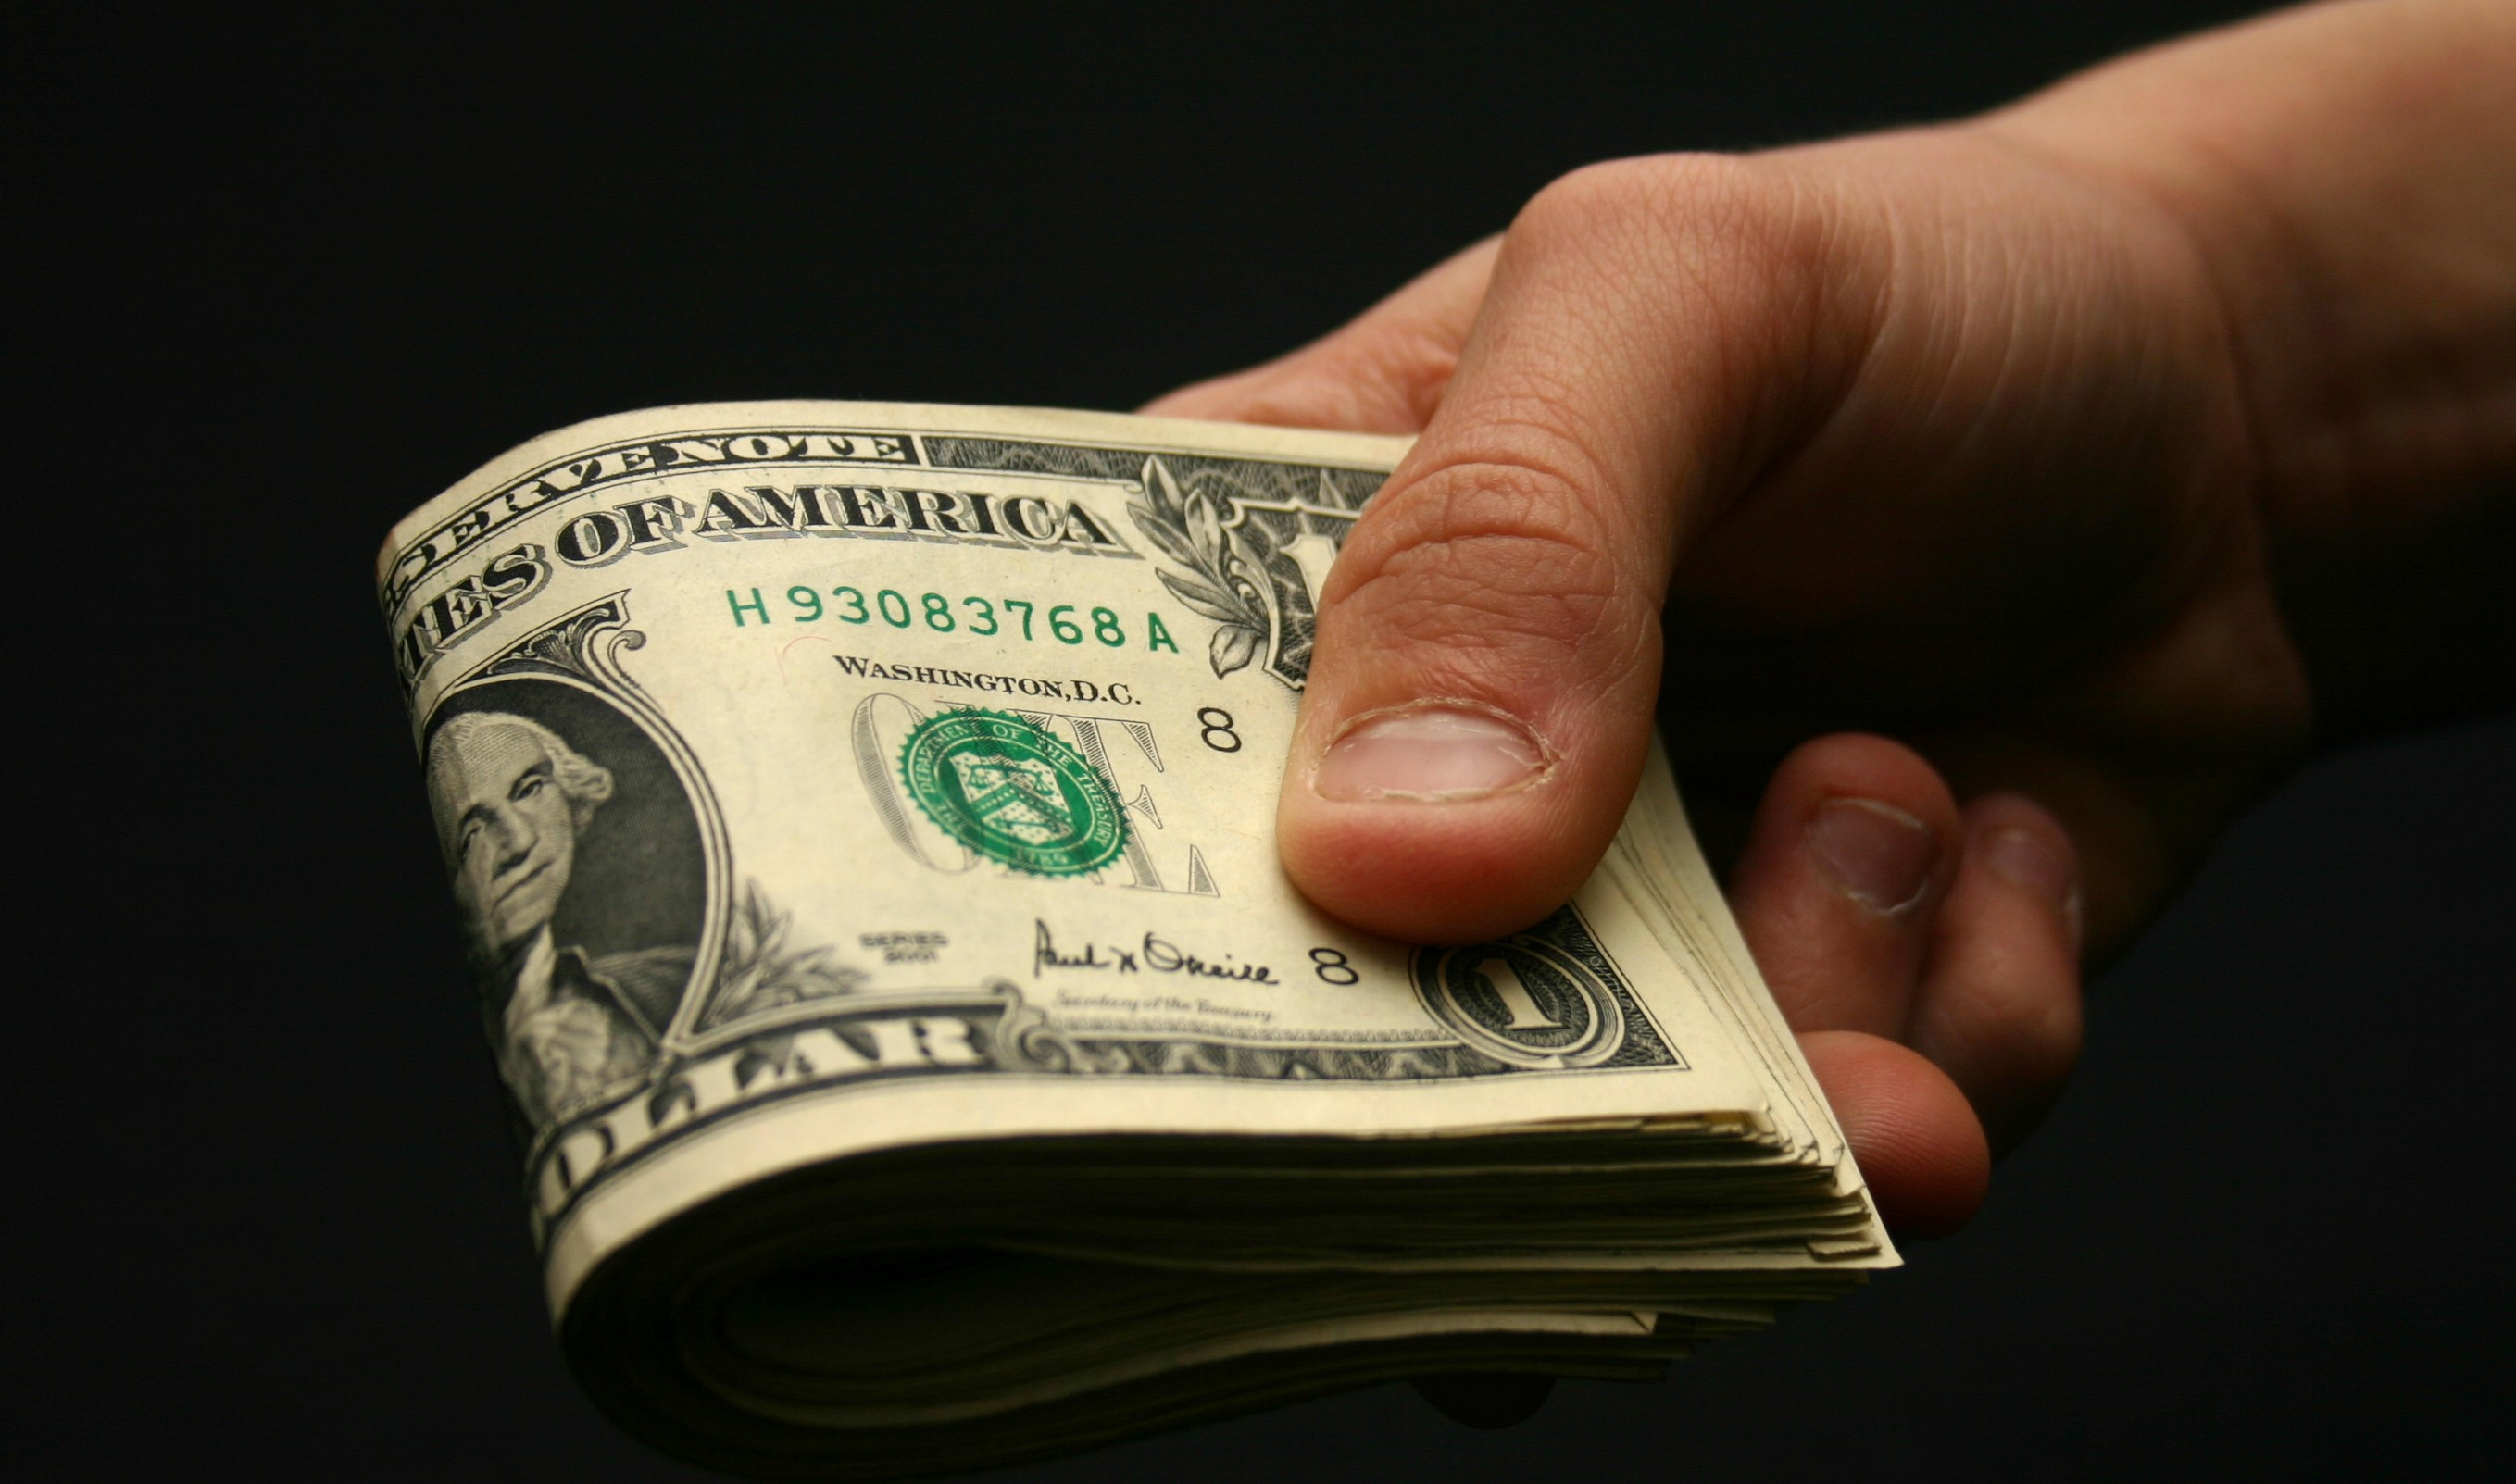

Today when businesses offers lending services it has risks associated with it.It has become hard to compete in market if we do not identify risks associated with it.So, it is important to make thorough research into historical data  and find out how we  would reduce risk while dealing with our clients.

This dataset contains complete loan data for all loans issued through the time period 2007 t0 2011.This notebook tries to do analysis on this data.


In [1]:
#importing all the elibraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt 
import seaborn as sns

In [2]:
#Read csv file
data=pd.read_csv(r'D:\UPGRAD\Lending Case study\loan\loan.csv',dtype=object)

In [3]:
#Basic exloration
#checking number of columns and rows
#data types
print(data.shape)
print(data.dtypes)

(39717, 111)
id                            object
member_id                     object
loan_amnt                     object
funded_amnt                   object
funded_amnt_inv               object
                               ...  
tax_liens                     object
tot_hi_cred_lim               object
total_bal_ex_mort             object
total_bc_limit                object
total_il_high_credit_limit    object
Length: 111, dtype: object


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


### Data cleaning 

In [5]:
#check for nulls 
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
#drop columns will all nulls
d=data.dropna(axis=1, how='all')

In [7]:
d.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [8]:
#lets drop some more columns having nulls 
columns_drop_list1 = ['emp_title','emp_length','desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d','zip_code']
d.drop(labels = columns_drop_list1, axis =1, inplace=True)

C:\Users\bhush\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [10]:
d.shape

(39717, 50)

In [11]:
#drop rows will  nulls
d1=d.dropna(axis=0, how='any')

In [12]:
d1.shape

(38889, 50)

In [13]:
d1.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prnc

In [14]:
# find duplicates 
d1.duplicated()
#no duplicates found 

0        False
1        False
2        False
3        False
4        False
         ...  
39475    False
39551    False
39562    False
39573    False
39623    False
Length: 38889, dtype: bool

In [15]:
d1.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0,1,INDIVIDUAL,0,0,0,0,0


In [16]:
# lets remove % sign from int_rate and 
d1['int_rate'] = d1['int_rate'].str.rstrip('%')

<ipython-input-16-9e49ec9becff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['int_rate'] = d1['int_rate'].str.rstrip('%')


In [17]:
d1.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,171.62,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0


In [18]:
# lets remove months from term 
d1['term'] = d1['term'].str.rstrip('months')

<ipython-input-18-c8b288a28b4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['term'] = d1['term'].str.rstrip('months')


In [19]:
d1.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36,10.65,162.87,B,B2,...,171.62,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60,15.27,59.83,C,C4,...,119.66,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400,36,15.96,84.33,C,C5,...,649.91,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000,36,13.49,339.31,C,C1,...,357.48,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000,60,12.69,67.79,B,B5,...,67.79,May-16,0,1,INDIVIDUAL,0,0,0,0,0
5,1075269,1311441,5000,5000,5000,36,7.90,156.46,A,A4,...,161.03,Jan-16,0,1,INDIVIDUAL,0,0,0,0,0
6,1069639,1304742,7000,7000,7000,60,15.96,170.08,C,C5,...,1313.76,May-16,0,1,INDIVIDUAL,0,0,0,0,0
7,1072053,1288686,3000,3000,3000,36,18.64,109.43,E,E1,...,111.34,Dec-14,0,1,INDIVIDUAL,0,0,0,0,0
8,1071795,1306957,5600,5600,5600,60,21.28,152.39,F,F2,...,152.39,Aug-12,0,1,INDIVIDUAL,0,0,0,0,0
9,1071570,1306721,5375,5375,5350,60,12.69,121.45,B,B5,...,121.45,Mar-13,0,1,INDIVIDUAL,0,0,0,0,0


In [20]:
d1.dtypes

id                            object
member_id                     object
loan_amnt                     object
funded_amnt                   object
funded_amnt_inv               object
term                          object
int_rate                      object
installment                   object
grade                         object
sub_grade                     object
home_ownership                object
annual_inc                    object
verification_status           object
issue_d                       object
loan_status                   object
pymnt_plan                    object
url                           object
purpose                       object
title                         object
addr_state                    object
dti                           object
delinq_2yrs                   object
earliest_cr_line              object
inq_last_6mths                object
open_acc                      object
pub_rec                       object
revol_bal                     object
r

In [21]:
# all are object we need to convert some to nuymberic to operate on it 
columns =['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','last_pymnt_amnt','annual_inc']
d1[columns]=d1[columns].apply(pd.to_numeric, errors='coerce',axis=1)

C:\Users\bhush\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [22]:
d1.dtypes

id                             object
member_id                      object
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                          float64
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
addr_state                     object
dti                            object
delinq_2yrs                    object
earliest_cr_line               object
inq_last_6mths                 object
open_acc                       object
pub_rec                        object
revol_bal   

In [23]:
d1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000.0,5000.0,4975.0,36.0,10.65,162.87,B,B2,...,171.62,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500.0,2500.0,2500.0,60.0,15.27,59.83,C,C4,...,119.66,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400.0,2400.0,2400.0,36.0,15.96,84.33,C,C5,...,649.91,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000.0,10000.0,10000.0,36.0,13.49,339.31,C,C1,...,357.48,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000.0,3000.0,3000.0,60.0,12.69,67.79,B,B5,...,67.79,May-16,0,1,INDIVIDUAL,0,0,0,0,0


#### As we know that only charged off and Fully paid need to be analysed 

In [24]:
d1['loan_status'].head(10)

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
4        Current
5     Fully Paid
6     Fully Paid
7     Fully Paid
8    Charged Off
9    Charged Off
Name: loan_status, dtype: object

In [25]:
#lets remove current 
d2 = d1[d1['loan_status'] != 'Current']

In [26]:
d2['loan_status'].head(20)

0      Fully Paid
1     Charged Off
2      Fully Paid
3      Fully Paid
5      Fully Paid
6      Fully Paid
7      Fully Paid
8     Charged Off
9     Charged Off
10     Fully Paid
11     Fully Paid
12    Charged Off
13     Fully Paid
14    Charged Off
15     Fully Paid
16     Fully Paid
17     Fully Paid
18     Fully Paid
19     Fully Paid
20     Fully Paid
Name: loan_status, dtype: object

In [27]:
n_by_state = d2.groupby("loan_status")["id"].count()
print(n_by_state)


loan_status
Charged Off     5422
Fully Paid     32327
Name: id, dtype: int64


#### From above we can conclude that around <font color='red'> 14.36% </font>loan  are  <font color='red'> Charged off </font>  and  <font color='green'> 85.64 </font> loans are <font color='green'>Fully paid </font>

<AxesSubplot:xlabel='loan_status', ylabel='count'>

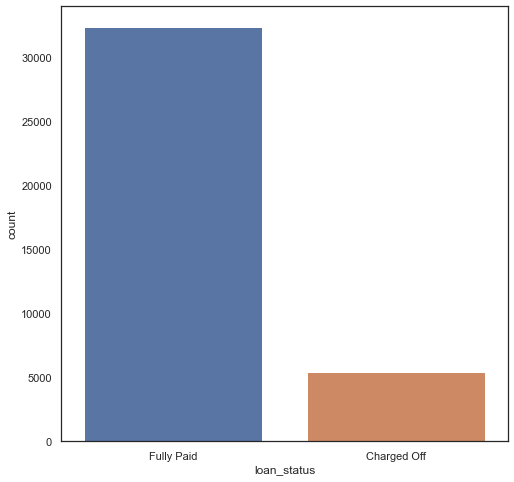

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8),facecolor='w')
sns.countplot(x = 'loan_status', data = d2)

#### Most of customers have fully paid the loan

## Lets analyse home ownership

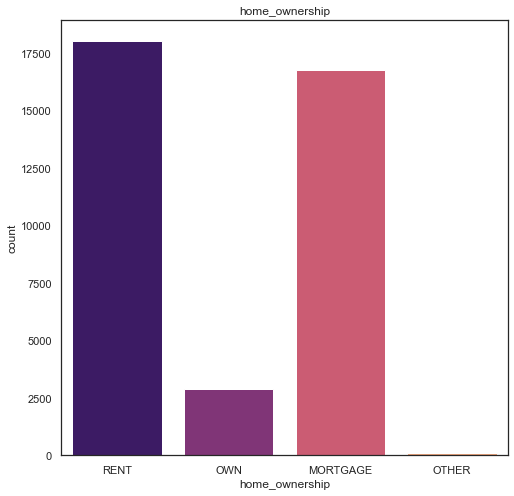

In [50]:
plt.figure(figsize=(8,8),facecolor='w')
sns.countplot(x = 'home_ownership', data = d2, palette = 'magma')
plt.title('home_ownership')
plt.show()

#### This shows that most of clients have home on rent or they have mortgaged their home

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

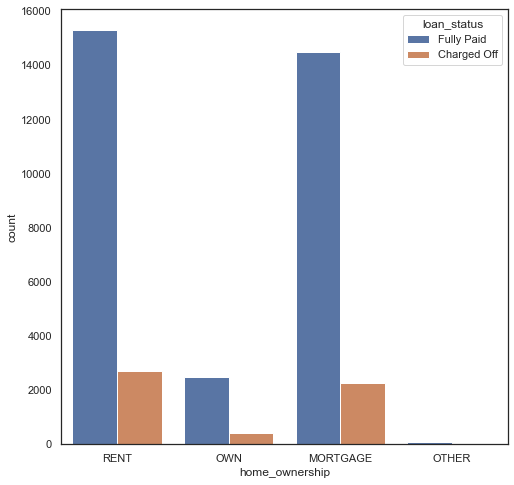

In [52]:
plt.figure(figsize=(8,8),facecolor='w')
sns.set(style='white')
sns.countplot(x='home_ownership', data=d2,hue='loan_status') 

#### From above graph we can conclude that most of defaulters have home on rent.

#### Most of Fully paid customers are having their homes on rent  

## Lets analyse purpose of loan 

<AxesSubplot:xlabel='count', ylabel='purpose'>

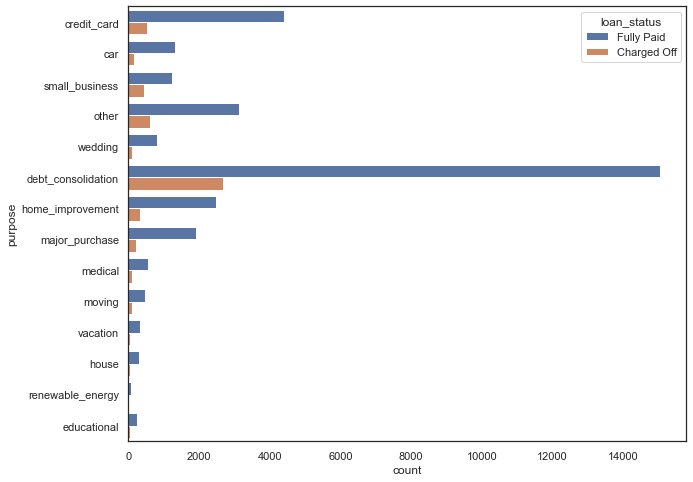

In [32]:
plt.figure(figsize=(10,8),facecolor='w')
sns.countplot( hue='loan_status',y='purpose',data=d2) 

#### Hence fully paid customers mostly has debt_consolidation as purpose while next fully paid customer reason is for the credit card

##### Most Charged off customers have debt consolidation as purpose.

### Lets analyse income source verfication 

<AxesSubplot:xlabel='count', ylabel='verification_status'>

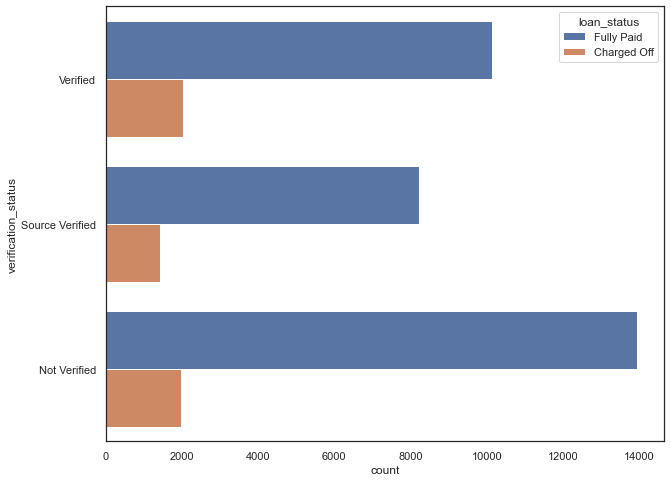

In [53]:
plt.figure(figsize=(10,8),facecolor='w')
sns.set(style='white')
sns.countplot(hue='loan_status',y='verification_status',data=d2) 

#### Hence most of the fully paid customers are having their income source not verified while most of charged off customers are having their income verified

## Lets analyse grade of loan 

In [34]:
d2['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='grade'>

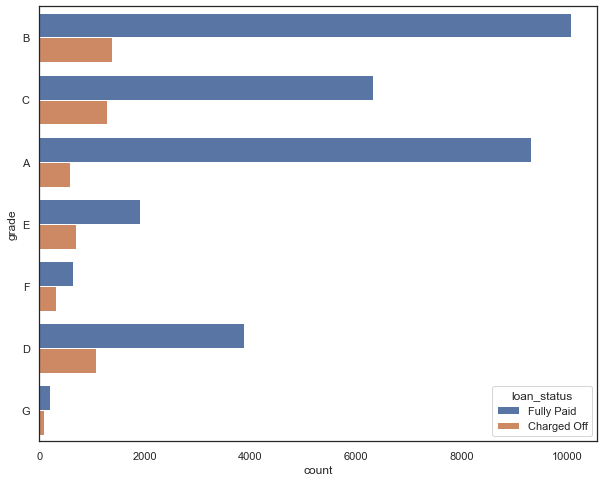

In [54]:
plt.figure(figsize=(10,8),facecolor='w')
sns.set(style='white')
sns.countplot( hue='loan_status',y='grade',data=d2) 

#### Hence most of defaulters are from B,C,D grade 

## Lets analyse term of loan

In [36]:
d2['term'].unique()

array([36., 60.])

<AxesSubplot:xlabel='count', ylabel='term'>

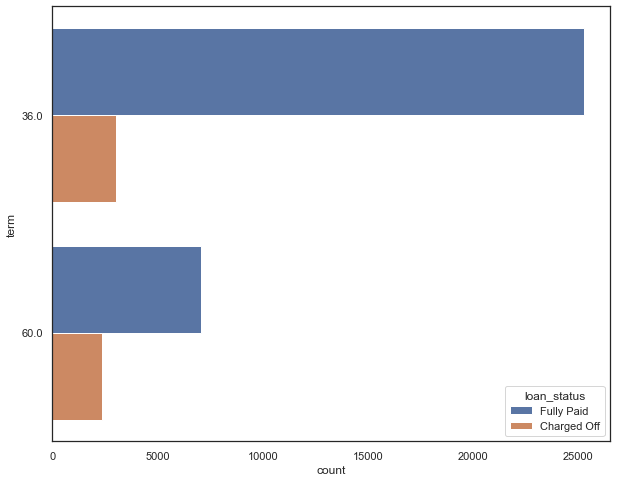

In [55]:
plt.figure(figsize=(10,8),facecolor='w')
sns.set(style='white')
sns.countplot( hue='loan_status',y='term',data=d2)

#### Most of fully paid customers have 36 month as loan term 

## lets analyse the public record of bamcruptcies

In [38]:
d2['pub_rec_bankruptcies'].unique()

array(['0', '1', '2'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='pub_rec_bankruptcies'>

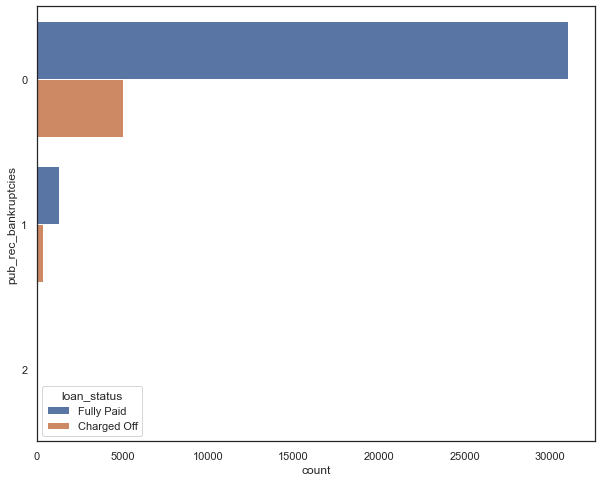

In [56]:
plt.figure(figsize=(10,8),facecolor='w')
sns.set(style='white')
sns.countplot( hue='loan_status',y='pub_rec_bankruptcies',data=d2)

#### if loan case come into public record it has most probability to be paid off

## Lets do the univariate analysis on total funded amount 

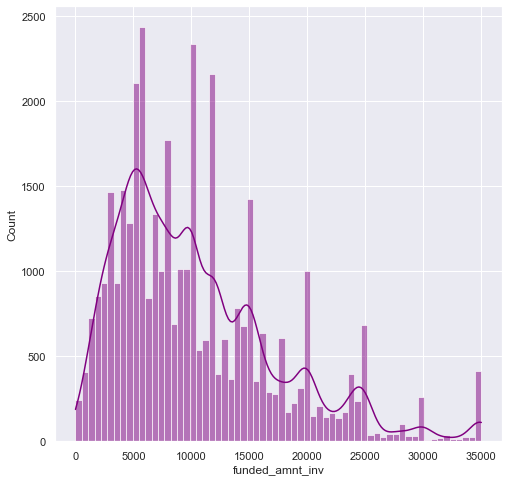

In [40]:
sns.set(style="darkgrid")
axs = plt.subplots(1, 1, figsize=(8,8 ))
sns.histplot(data=d2, x="funded_amnt_inv", kde=True, color="Purple")
plt.show()

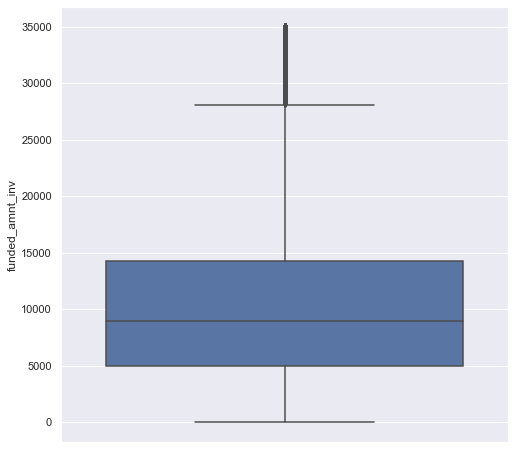

In [41]:
sns.set(style="darkgrid")
axs = plt.subplots(1, 1, figsize=(8,8 ))
sns.boxplot(y=d2['funded_amnt_inv'])
plt.show()

#### Most of funded amount is between 5000 to 14000

## Lets do univariate analysis on interest rate 

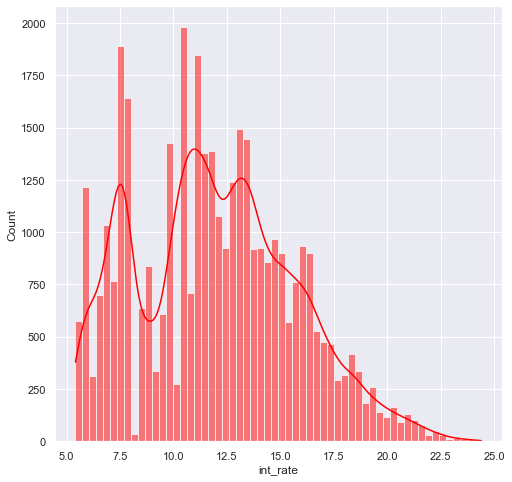

In [42]:
sns.set(style="darkgrid")
axs = plt.subplots(1, 1, figsize=(8,8 ))
sns.histplot(data=d2, x="int_rate", kde=True, color="red")
plt.show()

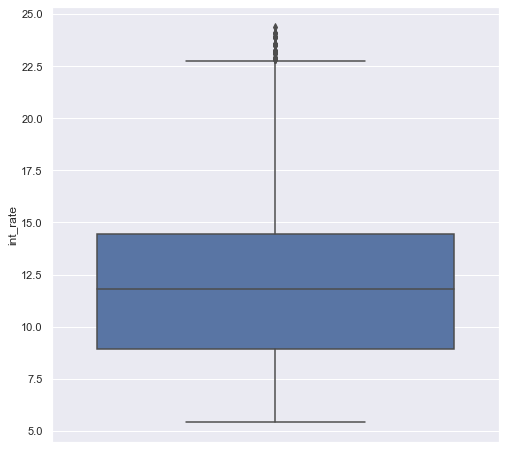

In [57]:
sns.set(style="darkgrid")
axs = plt.subplots(1, 1, figsize=(8,8 ))
sns.boxplot(y=d2['int_rate'])
plt.show()

#### Most of loans are offered at 8-14% interest rate

### Lets analyse purpose of loan with loam amount 

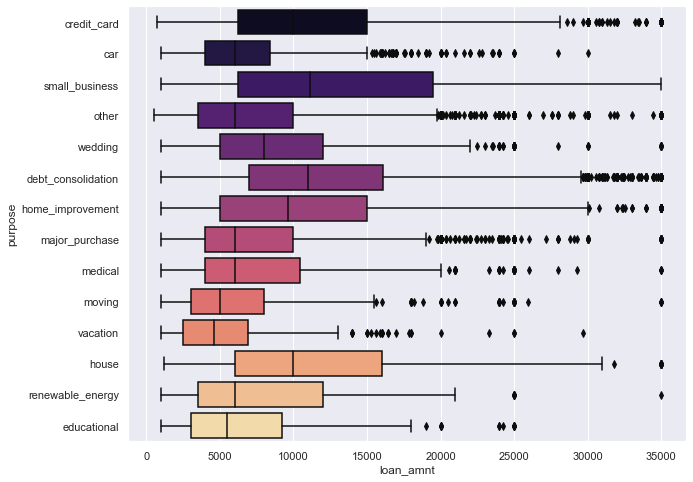

In [44]:
plt.figure(figsize=(10,8),facecolor='w')
plot= sns.boxplot(y='purpose', x='loan_amnt', data =d2,palette='magma')


#### Most of loans are sanctioned for small businesses

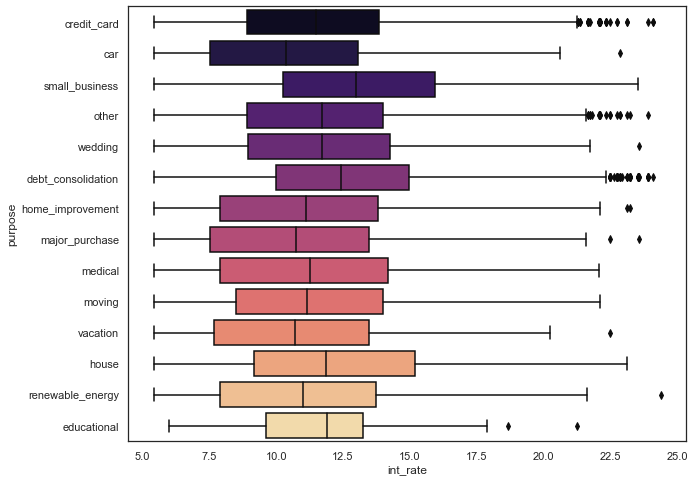

In [48]:
plt.figure(figsize=(10,8),facecolor='w')
plot= sns.boxplot(y='purpose', x='int_rate', data =d2,palette='magma')

#### Average interest rate higher for small business purpose